In [1]:
from mplsoccer import Sbopen, Pitch
import numpy as np
from variables import player_iden, player_nn, cur_team, comp_name

In [2]:
parser = Sbopen()
match_id = 3837876

In [3]:
events, related, freeze, players = parser.event(match_id)

In [4]:
team2 = list(set(events.team_name.unique()) - {cur_team})[0]

In [5]:
passes = events[(events['type_name'] == "Pass") & (events['player_id'] == player_iden)]

In [6]:
passes = passes.fillna({'outcome_name':1})
passes_completed = passes[(passes['outcome_name'] == 1)] #Successful passes
passes_other = passes[(passes['outcome_name'] != 1)]

In [7]:
loc_comp_arr = []
end_loc_comp_arr = []
for i in range(len(passes_completed)):
    loc_comp_arr.append([passes_completed['x'].iloc[i], passes_completed['y'].iloc[i]])
    end_loc_comp_arr.append([passes_completed['end_x'].iloc[i], passes_completed['end_y'].iloc[i]])
passes_completed['location'] = loc_comp_arr
passes_completed['end_location'] = end_loc_comp_arr

loc_other_arr = []
end_loc_other_arr = []
for i in range(len(passes_other)):
    loc_other_arr.append([passes_other['x'].iloc[i], passes_other['y'].iloc[i]])
    end_loc_other_arr.append([passes_other['end_x'].iloc[i], passes_other['end_y'].iloc[i]])
passes_other['location'] = loc_other_arr
passes_other['end_location'] = end_loc_other_arr

C:\TEMP\ipykernel_8184\557793581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_completed['location'] = loc_comp_arr
C:\TEMP\ipykernel_8184\557793581.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_completed['end_location'] = end_loc_comp_arr
C:\TEMP\ipykernel_8184\557793581.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [8]:
coordinates_completed = passes_completed[['location', 'end_location']]
coordinates_other = passes_other[['location', 'end_location']]

In [9]:
#Coords of successful passes
xc1, yc1 = np.array(coordinates_completed['location'].tolist()).T
xc2, yc2 = np.array(coordinates_completed['end_location'].tolist()).T

#Coords of UNsuccessful passes
xo1, yo1 = np.array(coordinates_other['location'].tolist()).T
xo2, yo2 = np.array(coordinates_other['end_location'].tolist()).T

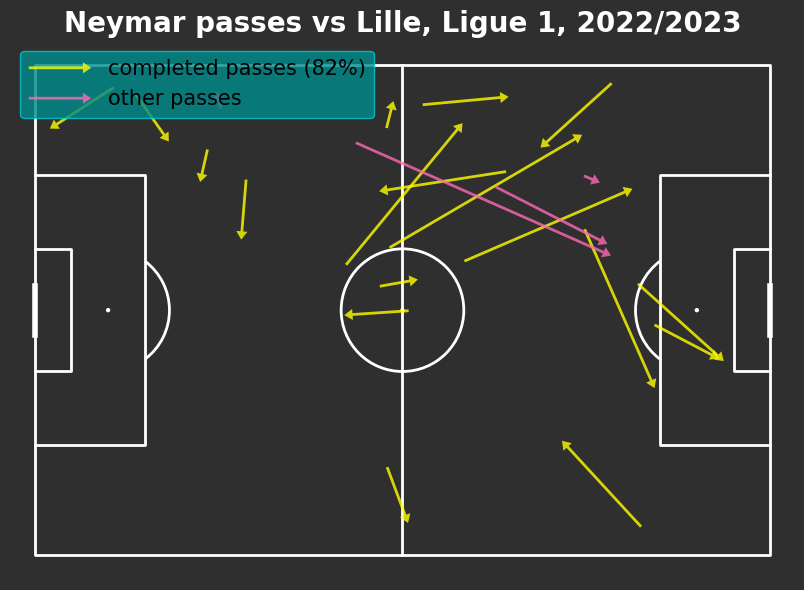

In [10]:
pitch = Pitch(pitch_color='#2F2F2F', line_color='white')
fig, ax = pitch.draw(figsize=(9, 6))
fig.set_facecolor('#2F2F2F')

pitch.arrows(xc1, yc1, xc2, yc2, alpha=0.8, color='yellow',
                 headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax,
             label=f'completed passes ({round(len(passes_completed)/len(passes)*100)}%)')

pitch.arrows(xo1, yo1, xo2, yo2, alpha=0.8, color='#FF69B4',
                 headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax, label='other passes')

ax.legend(facecolor='#008B8B', handlelength=3, edgecolor='#00CED1', fontsize=15, loc='upper left')
ax_title = ax.set_title(f'{player_nn} passes vs {team2}, {comp_name}',
                        fontsize=20, fontweight='bold', color='white')